# Task 2

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application.

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best.


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How many of the loan applicants have dependents based on the historical dataset?

5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

6. Are applicants with a credit history more likely to default than those who do not have one?

7. Is there a correlation between the applicant's income and the loan amount they applied for?

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [26]:
!pip install sweetviz
#uncomment the above if you need to install the library
!pip install auto-sklearn
#uncomment the above if you need to install the library

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [27]:
!pip install --upgrade scipy

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
# import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Datasets

In [30]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebook/Standard Bank - The Forage/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebook/Standard Bank - The Forage/test.csv')

# Part One

## EDA

In [31]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [33]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


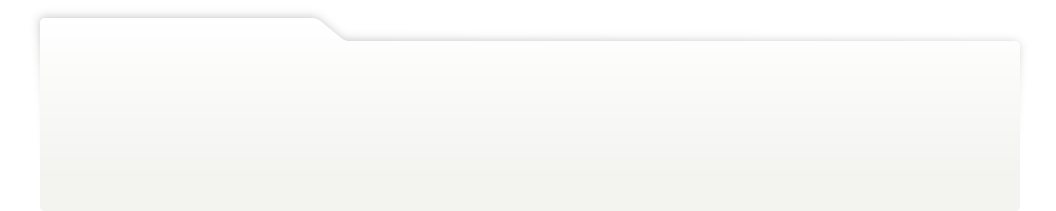
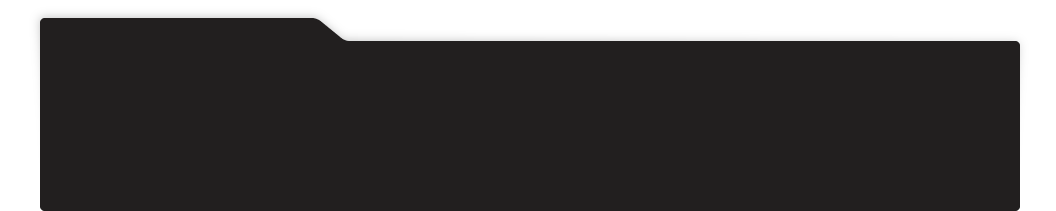
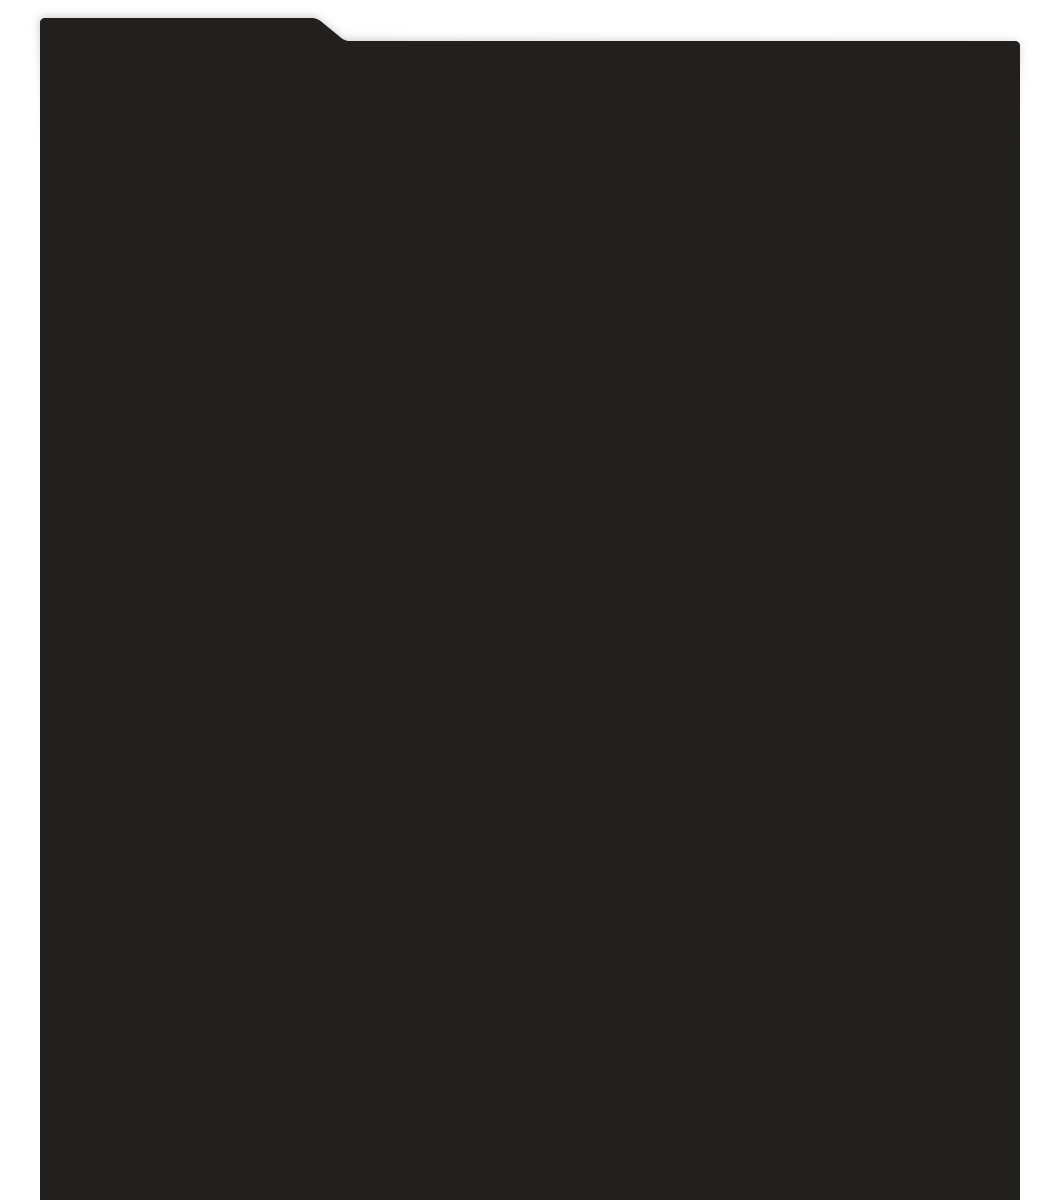
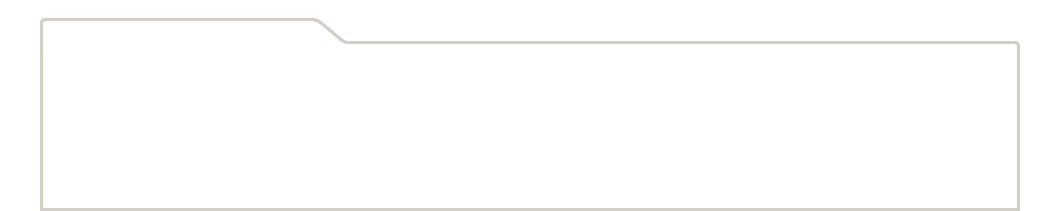
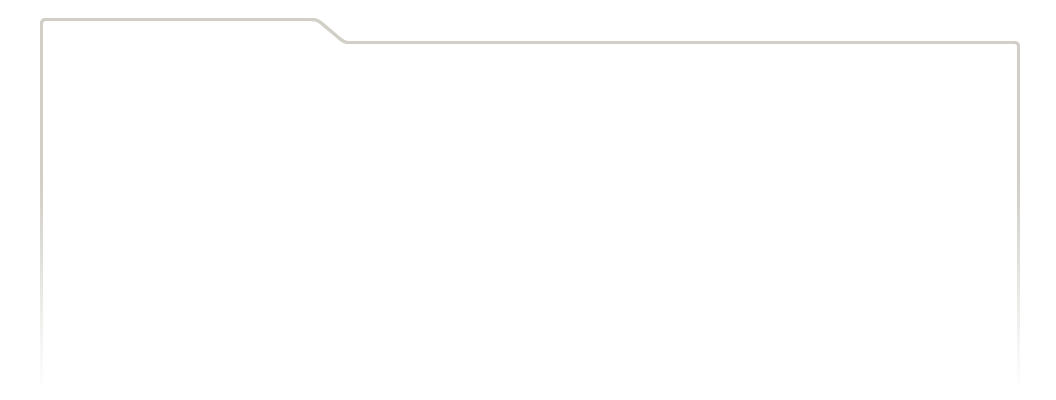
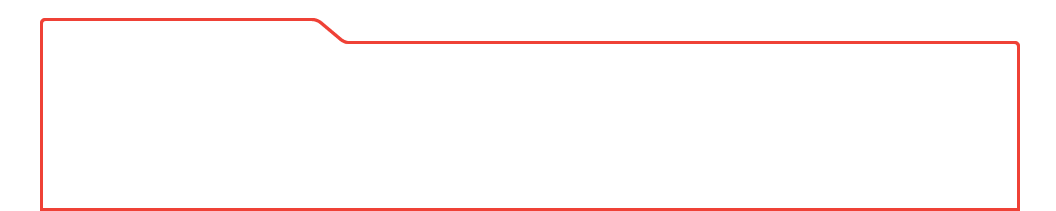
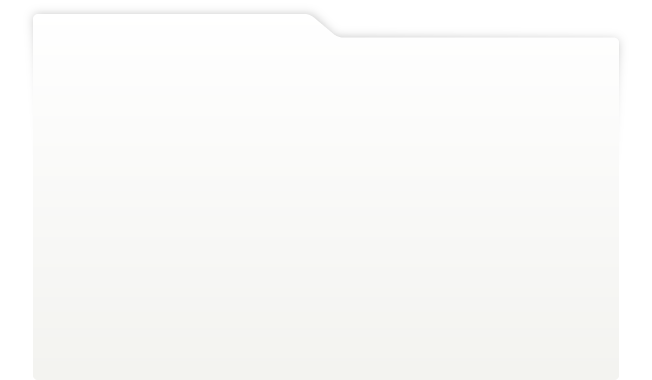
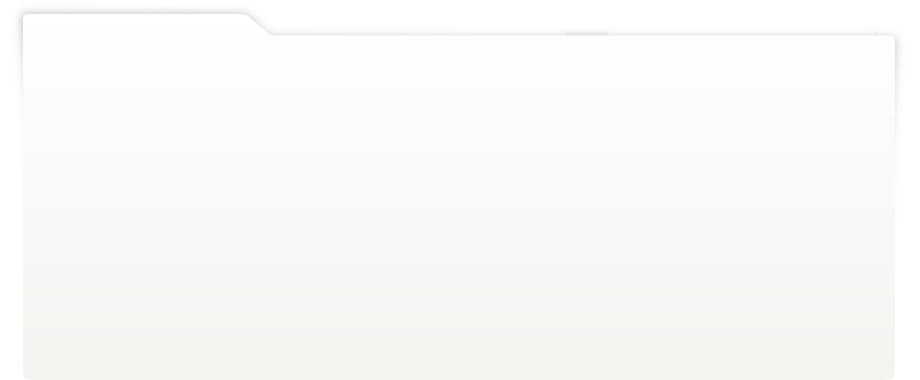
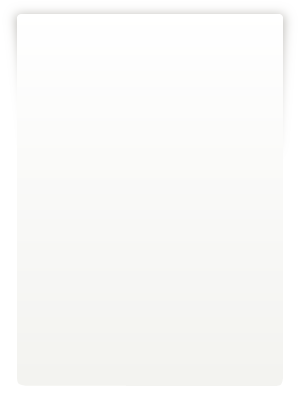
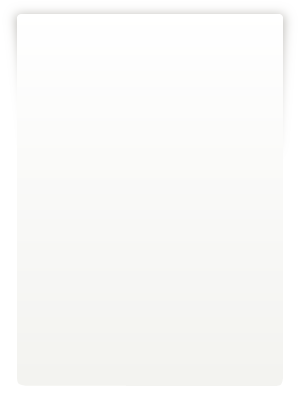
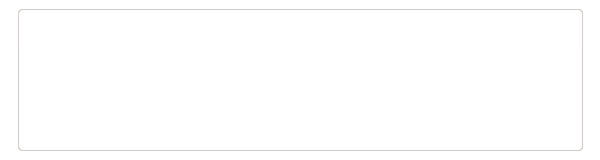
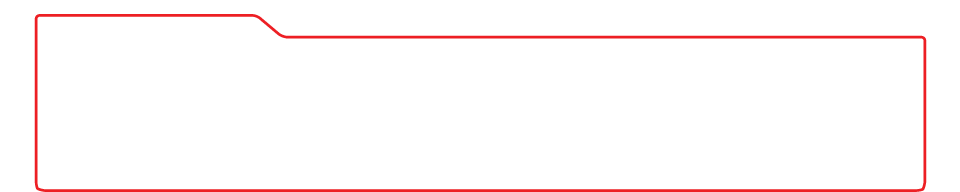
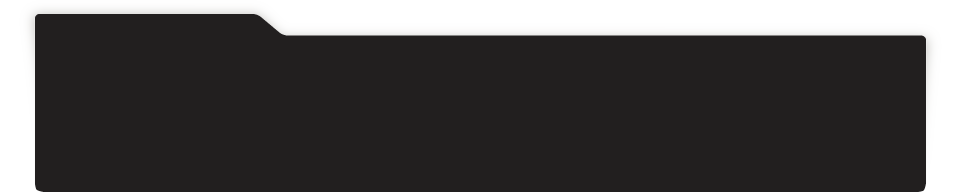
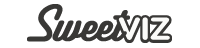
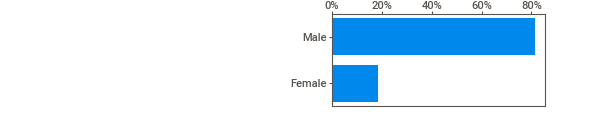
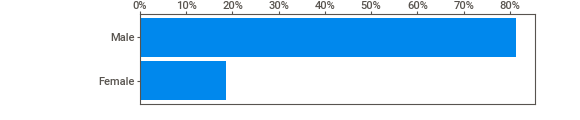
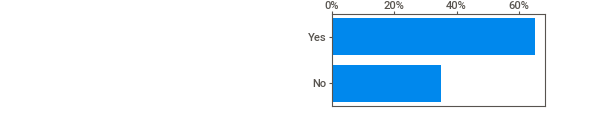
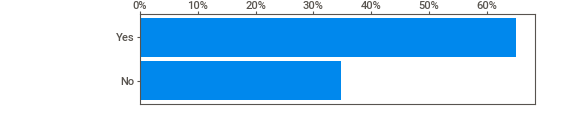
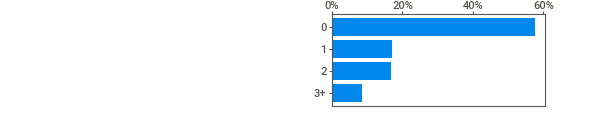
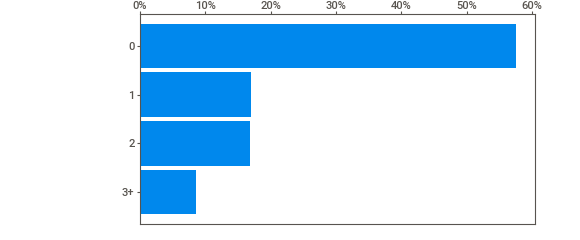
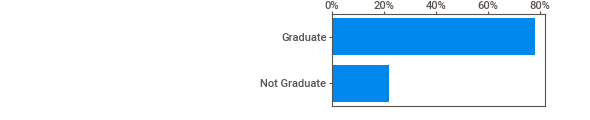
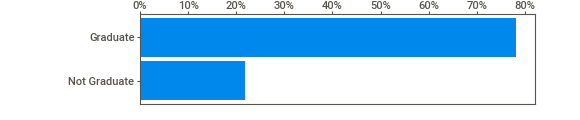
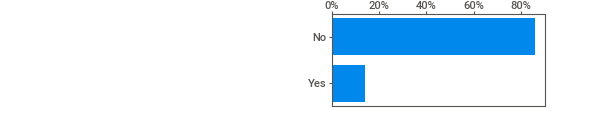
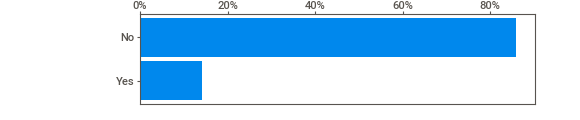
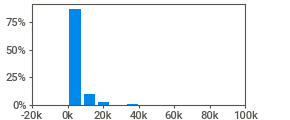
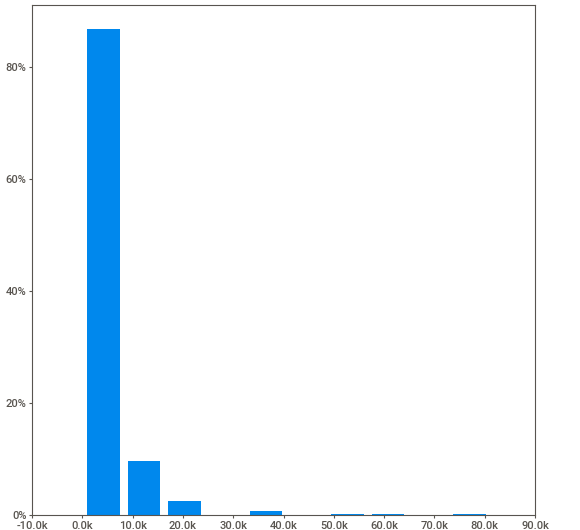
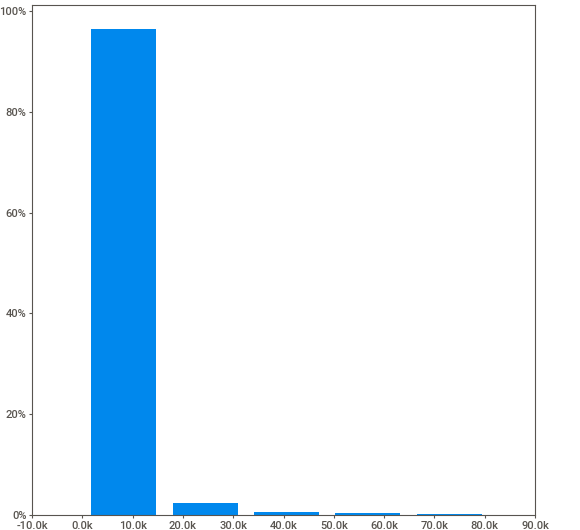
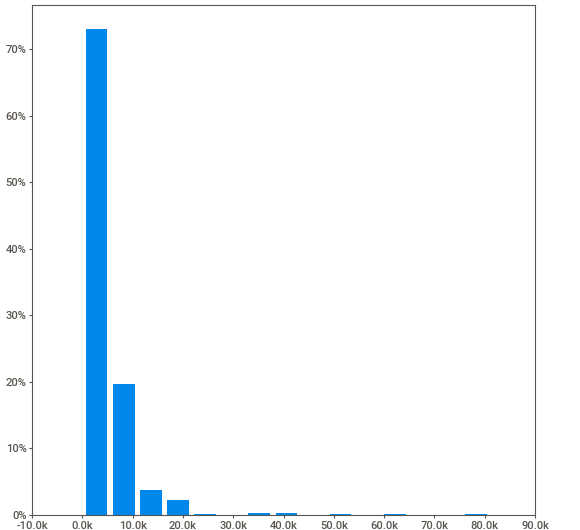
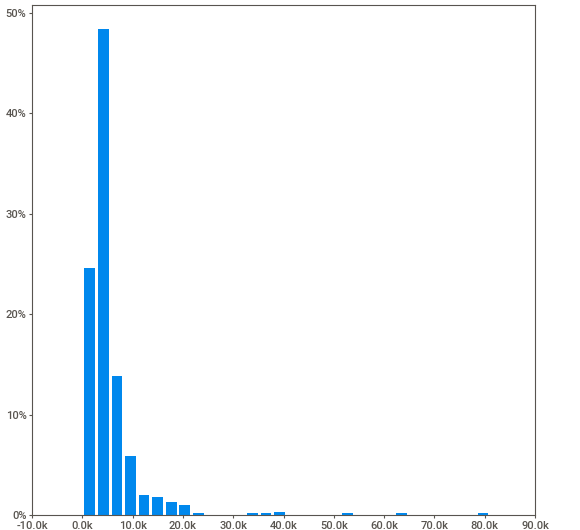
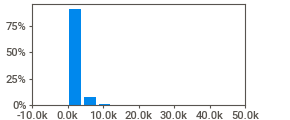
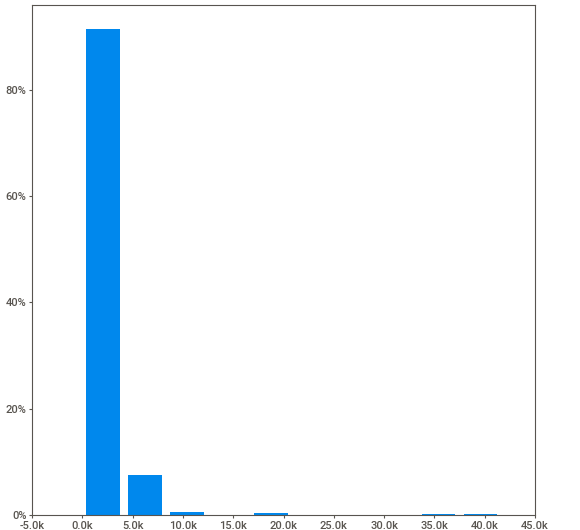
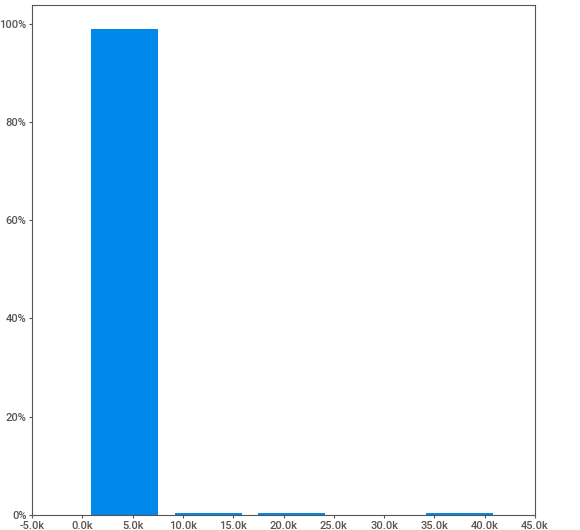
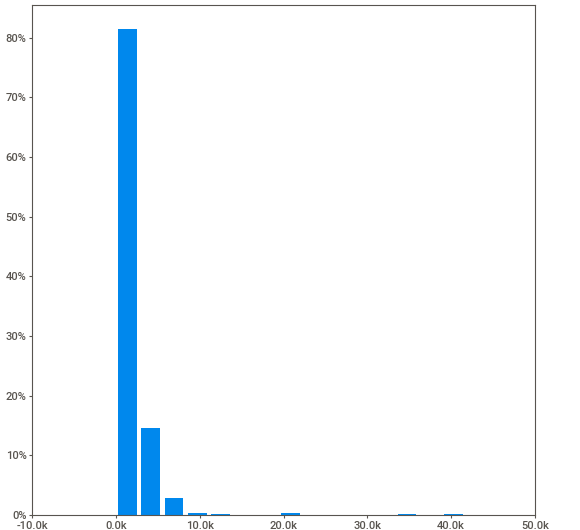
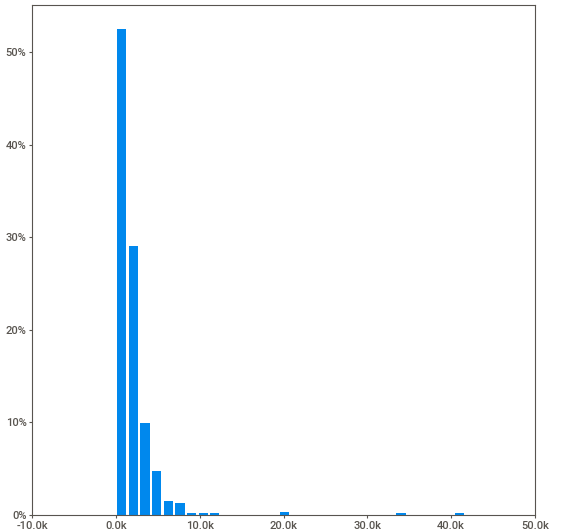
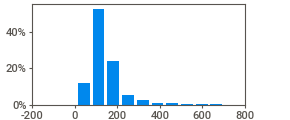
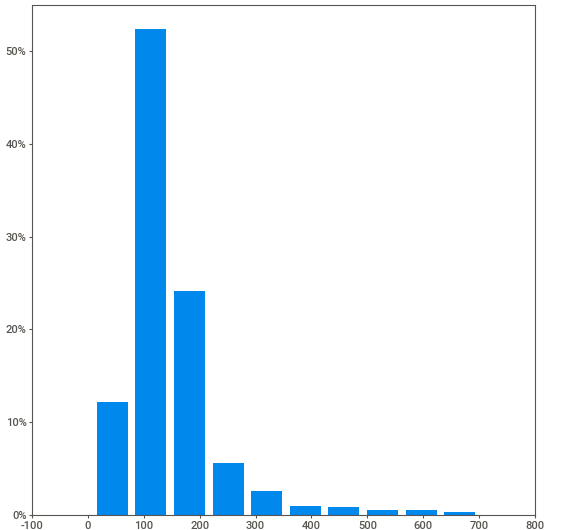
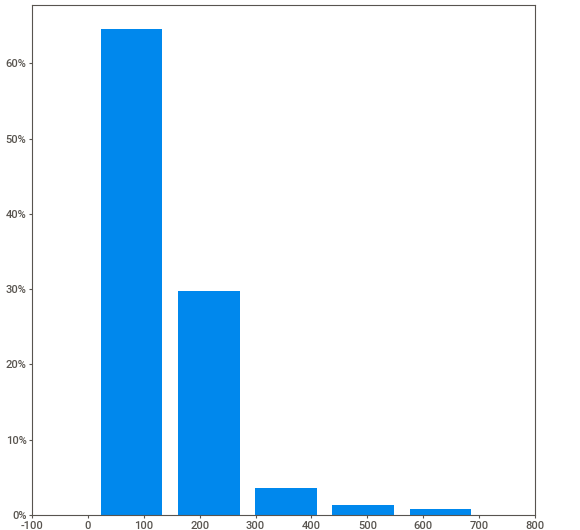
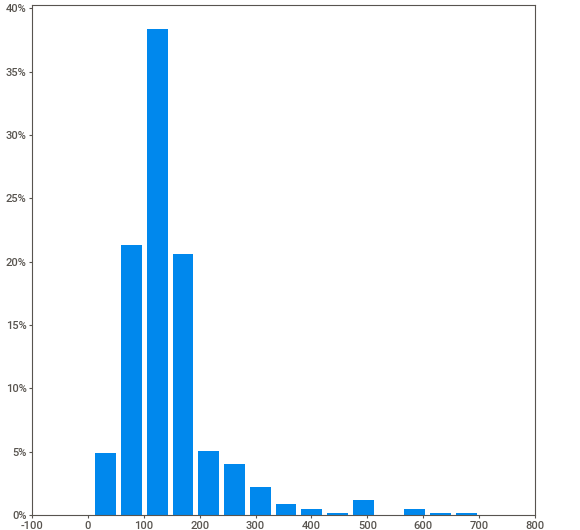
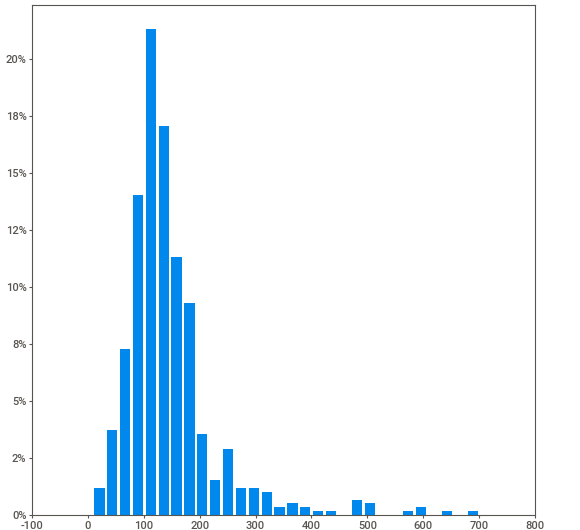
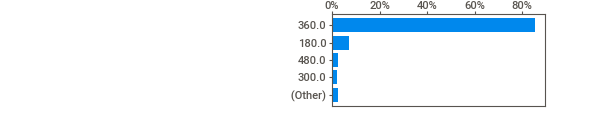
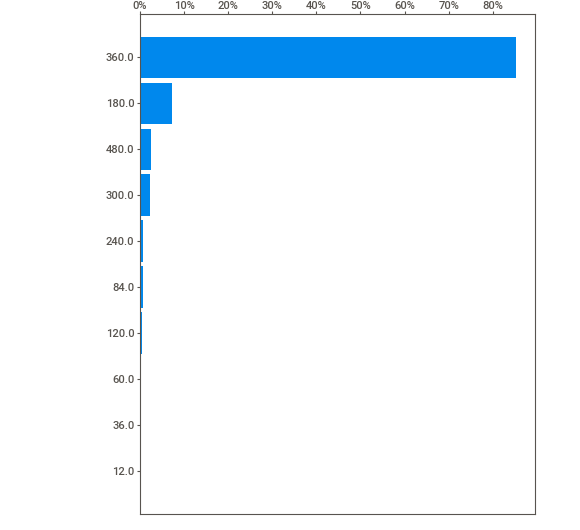
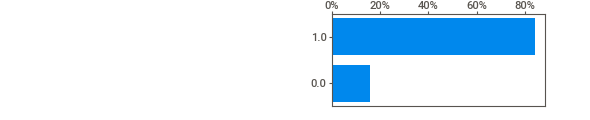
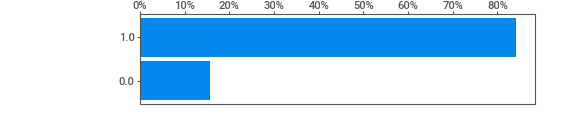
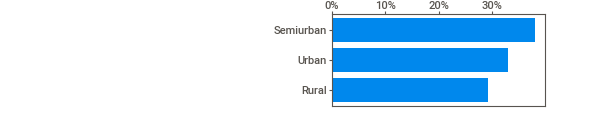
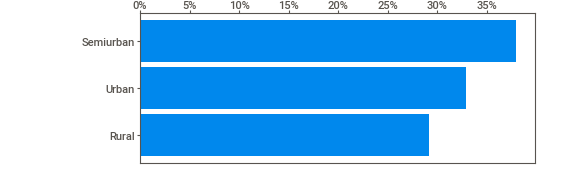
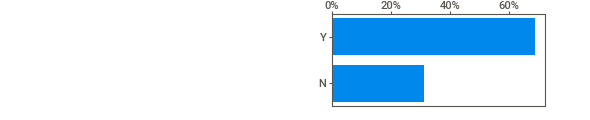
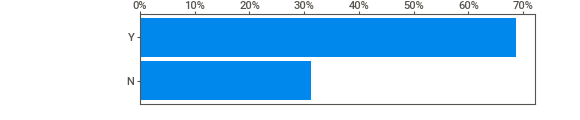
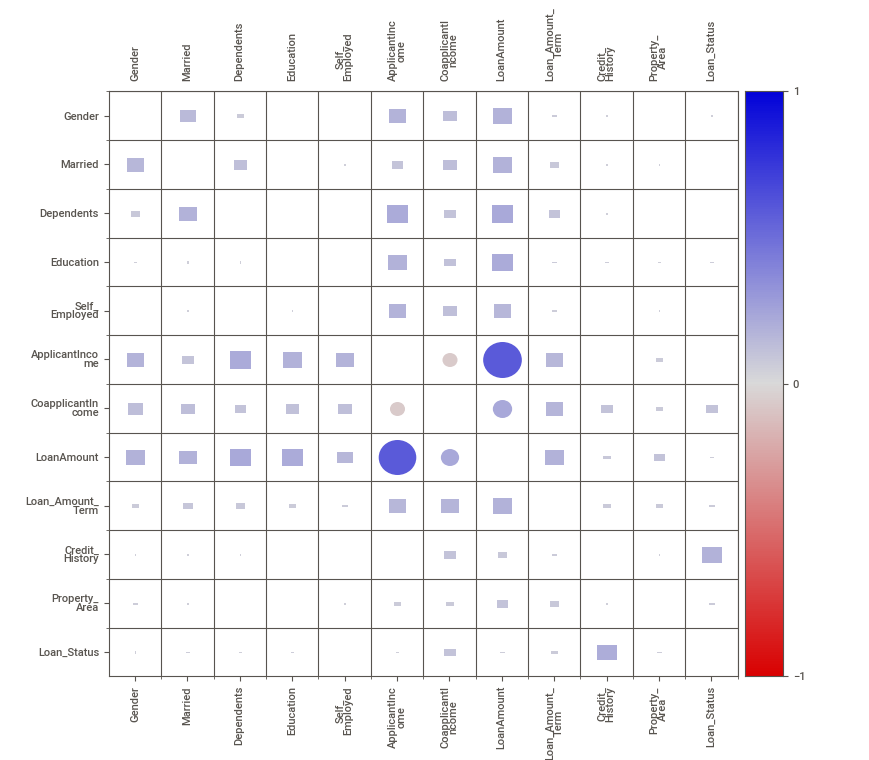
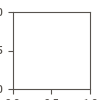

In [34]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA


In [35]:
print("Number of train columns: ", train.shape[1])
print("Number of train rows: ", train.shape[0])
print()
print("Number of test columns: ", test.shape[1])
print("Number of test rows: ", test.shape[0])

Number of train columns:  13
Number of train rows:  614

Number of test columns:  12
Number of test rows:  367


In [36]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [38]:
# Search for any missing values and duplicates for train dataset
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# Search for any missing values and duplicates for test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

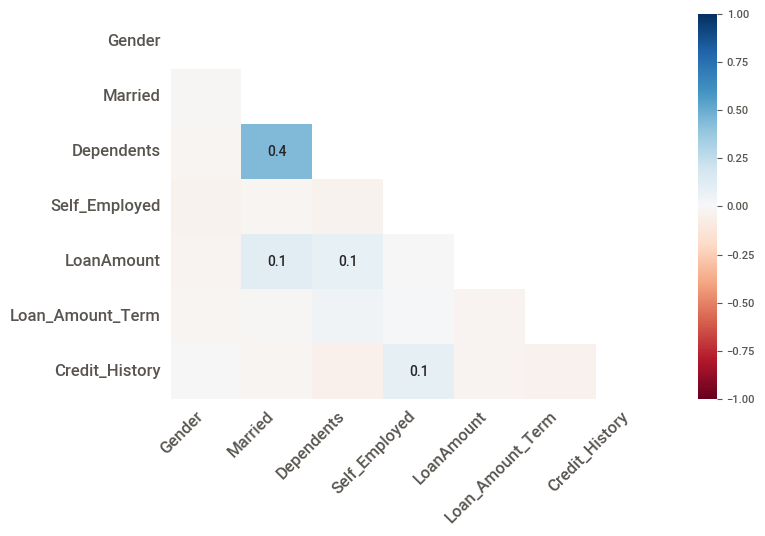

In [54]:
import missingno as mso

mso.heatmap(train, figsize=(8,5), fontsize=12)

In [40]:
# Seach for duplicates
print("Duplicate in train data: ",train.duplicated().any())
print("Duplicate in test data: ", test.duplicated().any())

Duplicate in train data:  False
Duplicate in test data:  False


%Yes Status:68.73%
%No Status: 31.27%


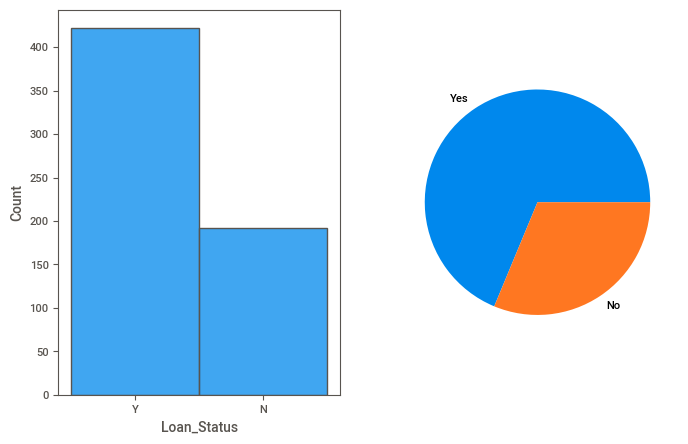

In [68]:
# Check the distribution of loan status for train dataset
loan_status_values = train['Loan_Status'].value_counts()
fig, axes = plt.subplots(figsize = (8,5), nrows=1, ncols = 2)
sns.histplot(train['Loan_Status'], ax=axes[0])
axes[1].pie(loan_status_values, labels=['Yes', 'No'])

percentage_yes = (loan_status_values[0]/(loan_status_values[0]+loan_status_values[1])*100).round(2)
percentage_no = (loan_status_values[1]/(loan_status_values[0]+loan_status_values[1])*100).round(2)

print(f"%Yes Status:{percentage_yes}%")
print(f"%No Status: {percentage_no}%")

In [42]:
num_applicants_with_dependent = (train['Dependents']!="0").sum()
print(num_applicants_with_dependent)

269


<Axes: xlabel='Dependents', ylabel='Count'>

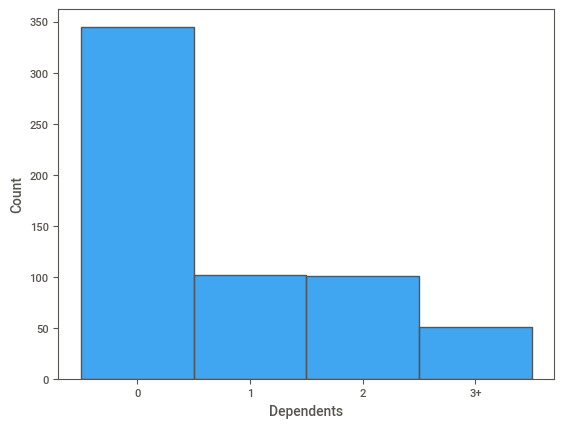

In [43]:
sns.histplot(train['Dependents'])

In [44]:
SelfEmployedIncome = train.loc[train['Self_Employed'] == "Yes", 'ApplicantIncome'].mean().round(2)
NonSelfEmployedIncome = train.loc[train['Self_Employed'] == "No", 'ApplicantIncome'].mean().round(2)

print("Income for Self Employed = ", SelfEmployedIncome)
print("Income for Non Self Employed = ", NonSelfEmployedIncome)

Income for Self Employed =  7380.82
Income for Non Self Employed =  5049.75


<Axes: xlabel='Loan_Status', ylabel='Count'>

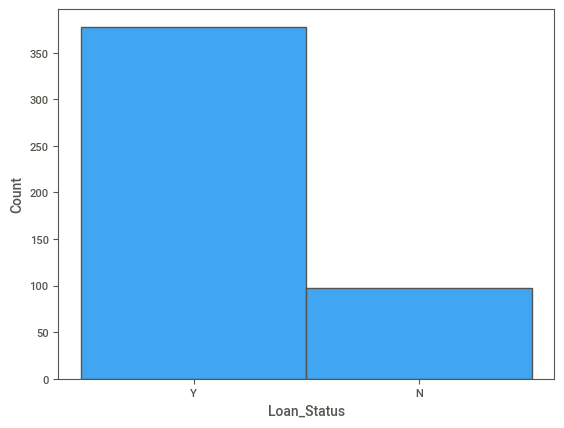

In [45]:
ApplicantWithCreditScore = train.loc[train['Credit_History']== 1.0]
sns.histplot(ApplicantWithCreditScore['Loan_Status'])

<Axes: xlabel='Loan_Status', ylabel='Count'>

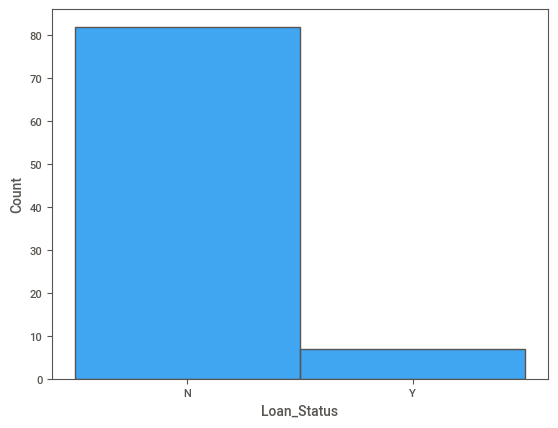

In [46]:
ApplicantWithoutCreditScore = train.loc[train['Credit_History']== 0.0]
sns.histplot(ApplicantWithoutCreditScore['Loan_Status'])

In [47]:
approval_rate_with_credit = df.loc[df['Credit_History'] == 1, 'Loan_Status'].value_counts(normalize=True)['Y'].round(4)
approval_rate_without_credit = df.loc[df['Credit_History'] == 0, 'Loan_Status'].value_counts(normalize=True)['Y'].round(4)
print("Loan approval rate for applicants with credit history:", approval_rate_with_credit*100)
print("Loan approval rate for applicants without credit history:", approval_rate_without_credit*100)

Loan approval rate for applicants with credit history: 79.58
Loan approval rate for applicants without credit history: 7.870000000000001


In [48]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

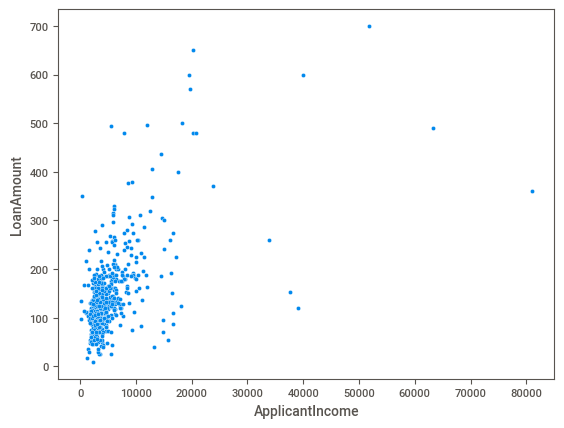

In [49]:
sns.scatterplot(data=train,
                x = 'ApplicantIncome',
                y = 'LoanAmount')

<Axes: xlabel='TotalIncome', ylabel='LoanAmount'>

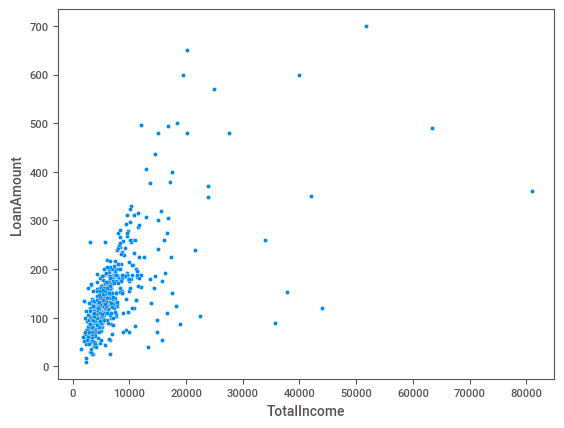

In [ ]:
sns.scatterplot(data=train,
                x = 'TotalIncome',
                y = 'LoanAmount')

<ipython-input-69-742b952ba4ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="coolwarm")


<Axes: >

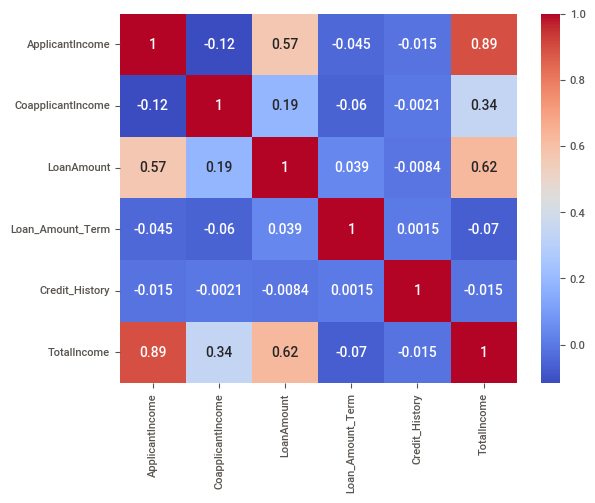

In [69]:
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")

## Your anwers:

1. Train dataset contains 613 rows and 13 columns. While Test dataset contains 367 rows and 12 columns. The one different columns is for Loan status that would be a target class for classification later. Both of datasets consist of object, float64 and integer datatypes.

2. The dataset contains missing values across several variables which is gender, married, dependents, self employed, loan amount, loan amount term, credit history for train dataset and gender, dependents, self employed, loan amount, loan amount term, credit history. We also analyze the correlation between each missing feature but it seems there is no significant correlation except for Dependents and Married feature. Meanwhile for duplicated data, we found no duplicated exist in both of datasets.

3. Comparing the loan status, approximately 68% has been approved and granted loans which is aroun 400 people get their loans.

4. Based on the historical dataset 269 applicant have dependents and the number of dependents they have the most is 1 and 2.

5. We compared the average income by self-employed and non self-employed applicant and the result show that self-employed applicant have higher average income than non self-employed applicant.

6. An analysis of the relationship between credit score history and loan approval status reveals a significant association between the two variables. Specifically, individuals with a positive credit score history are notably more likely to receive loan approval compared to those with a less favorable credit history. 78% applicant who get positive credit score is get their loan approved while only 8% of people without credit score got approved.

7. Loan amount and applicant income show 0.52 as correlation score that suggest both of feature have moderate positive correlation. It means if as the income increases, the loan amount tend to increases as well and vice versa.

# Part Two

## Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [ ]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [78]:
# Matrix of features

df = train[['Education','Property_Area']]

### Include Numerical Features Here ###
Numerical_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','LoanAmountTerm','CreditHistory']
df[Numerical_features] = train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
### Handle Missing Values Here ###
imputer = SimpleImputer(strategy='mean')
df[['LoanAmount','LoanAmountTerm','CreditHistory']] = imputer.fit_transform(df[['LoanAmount','LoanAmountTerm','CreditHistory']])
### Scale Here ###
scaler = StandardScaler()
df[Numerical_features] = scaler.fit_transform(df[Numerical_features])

# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-78-6b965532f6e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Numerical_features] = train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
<ipython-input-78-6b965532f6e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Numerical_features] = train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
<ipython-input-78-6b965532f6e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [80]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [85]:
# train
clf_log = LogisticRegression() #change model here
clf_log.fit(X_train, y_train)

# predict
predictions_clf_log = clf_log.predict(X_test)

In [86]:
print('Model Accuracy:', accuracy_score(predictions_clf_log, y_test))

Model Accuracy: 0.7886178861788617


In [87]:
print(confusion_matrix(predictions_clf_log, y_test))

[[18  1]
 [25 79]]


In [88]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier() #change model here
clf_DT.fit(X_train, y_train)

# predict
predictions_clf_DT = clf_DT.predict(X_test)

In [89]:
print('Model Accuracy:', accuracy_score(predictions_clf_DT, y_test))

Model Accuracy: 0.7154471544715447


In [90]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier() #change model here
clf_rf.fit(X_train, y_train)

# predict
predictions_clf_rf = clf_rf.predict(X_test)

print('Model Accuracy:', accuracy_score(predictions_clf_rf, y_test))

Model Accuracy: 0.7398373983739838
